Represent the Delta flights as a network. What are the nodes? What are the links?

In [1]:
# imports
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pyproj
import folium

%matplotlib inline

In [2]:
# read the data
routes = pd.read_csv('data/delta_routes.csv')
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 14 columns):
Unnamed: 0          1146 non-null int64
airline             1146 non-null object
airline_id          1146 non-null float64
source              1146 non-null object
source_id           1146 non-null float64
dest                1146 non-null object
dest_id             1146 non-null float64
codeshare           0 non-null float64
stops               1146 non-null int64
equipment           1144 non-null object
latitude_source     1146 non-null float64
longitude_source    1146 non-null float64
latitude_dest       1146 non-null float64
longitude_dest      1146 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 125.5+ KB


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


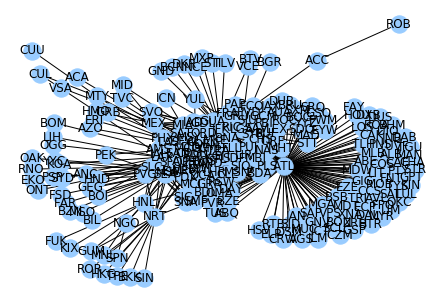

In [3]:
adjmatrix = routes[["source","dest"]]

flight_graph = nx.Graph()

# flight_graph.add_nodes_from(adjmatrix["source"].values)
# flight_graph.add_nodes_from(adjmatrix["dest"].values)

# flight_graph.nodes()
cUnique =set()

for ind in adjmatrix.index:
    flight_graph.add_edge(adjmatrix['source'][ind],adjmatrix['dest'][ind])
    cUnique.add(adjmatrix['source'][ind])
    cUnique.add(adjmatrix['dest'][ind])
#     flight_graph.add_edge(str(row['source']),str(row['dest']))

flight_graph.nodes()
BLUE = "#99CCFF"
nx.draw(flight_graph, node_color=BLUE, with_labels=True)

Which is the most important airport in Delta's network? Support your answer using appropriate network metrics. 

In [4]:
len(cUnique)

230

In [5]:
def get_top_node(lstdeg,top):    
    x_max = float(0)
    x_city = ""
    for strCity, degNode in lstdeg:
        if degNode > x_max:
            x_max = degNode
            x_city = strCity            
    return x_max, x_city

In [6]:
# degree distrib., non-normalized
print('Degree Centrality:')
dC = list(flight_graph.degree)
top_cen = get_top_node(dC,1)
print(top_cen)

Degree Centrality:
(170, 'ATL')


How many flights are needed to reach Honolulu? 

In [7]:
# Display average shortest path details
# nx.draw(flight_graph)
print('Avg shortest path from LEX to HNL is', nx.shortest_path_length(flight_graph, 'LEX','HNL'), 'hops:')
print(nx.shortest_path(flight_graph, 'LEX','HNL'))

Avg shortest path from LEX to HNL is 2 hops:
['LEX', 'ATL', 'HNL']


In [8]:
print('Avg shortest path in delta network is', nx.average_shortest_path_length(flight_graph))

Avg shortest path in delta network is 2.3404974368710842


What is the maximum number of flights needed to reach any destination in Delta's network?

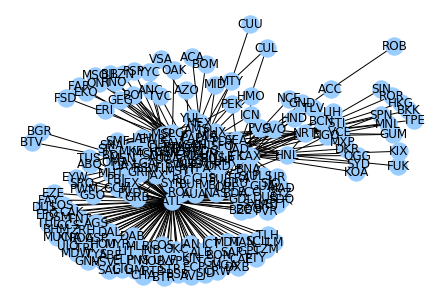

In [9]:
adjmat = routes[["source","dest"]]
flightgraph = nx.Graph()

# flight_graph.nodes()
unique_city =set()
weightage=+1
for ind in adjmat.index:
    flightgraph.add_edge(adjmat['source'][ind],adjmat['dest'][ind],weight=weightage)
    unique_city.add(adjmat['source'][ind])
    unique_city.add(adjmat['dest'][ind])
#     flight_graph.add_edge(str(row['source']),str(row['dest']))

flightgraph.nodes()
BLUE = "#99CCFF"
nx.draw(flightgraph, node_color=BLUE, with_labels=True)

In [10]:
# Display average shortest path details
# nx.draw(flightgraph)
# max_distance = nx.floyd_warshall(flightgraph,weight="weight")
max_distance = nx.all_pairs_bellman_ford_path_length(flightgraph,weight="weight")
for dist in max_distance:
    print(dist)
    print("\n")

('ABE', {'ABE': 0, 'ATL': 1, 'ABQ': 2, 'AGS': 2, 'ALB': 2, 'AMS': 2, 'AUA': 2, 'AUS': 2, 'AVL': 2, 'BDA': 2, 'BDL': 2, 'BHM': 2, 'BNA': 2, 'BOG': 2, 'BON': 2, 'BOS': 2, 'BRU': 2, 'BSB': 2, 'BTR': 2, 'BUF': 2, 'BWI': 2, 'BZE': 2, 'CAE': 2, 'CAK': 2, 'CCS': 2, 'CDG': 2, 'CHA': 2, 'CHS': 2, 'CLE': 2, 'CLT': 2, 'CMH': 2, 'COS': 2, 'CRW': 2, 'CUN': 2, 'CVG': 2, 'CZM': 2, 'DAB': 2, 'DAY': 2, 'DCA': 2, 'DEN': 2, 'DFW': 2, 'DSM': 2, 'DTW': 2, 'DUB': 2, 'DUS': 2, 'DXB': 2, 'ECP': 2, 'ELP': 2, 'EWR': 2, 'EYW': 2, 'EZE': 2, 'FAY': 2, 'FCO': 2, 'FLL': 2, 'FNT': 2, 'FPO': 2, 'FRA': 2, 'GCM': 2, 'GDL': 2, 'GIG': 2, 'GNV': 2, 'GPT': 2, 'GRR': 2, 'GRU': 2, 'GSO': 2, 'GSP': 2, 'GUA': 2, 'HNL': 2, 'HOU': 2, 'HSV': 2, 'IAD': 2, 'IAH': 2, 'ICT': 2, 'ILM': 2, 'IND': 2, 'JAN': 2, 'JAX': 2, 'JFK': 2, 'JNB': 2, 'KIN': 2, 'LAS': 2, 'LAX': 2, 'LEX': 2, 'LGA': 2, 'LHR': 2, 'LIM': 2, 'LIR': 2, 'LIT': 2, 'LOS': 2, 'MAD': 2, 'MAN': 2, 'MBJ': 2, 'MCI': 2, 'MCO': 2, 'MDT': 2, 'MDW': 2, 'MEM': 2, 'MEX': 2, 'MGA': 2, '

('PTY', {'PTY': 0, 'ATL': 1, 'ABE': 2, 'ABQ': 2, 'AGS': 2, 'ALB': 2, 'AMS': 2, 'AUA': 2, 'AUS': 2, 'AVL': 2, 'BDA': 2, 'BDL': 2, 'BHM': 2, 'BNA': 2, 'BOG': 2, 'BON': 2, 'BOS': 2, 'BRU': 2, 'BSB': 2, 'BTR': 2, 'BUF': 2, 'BWI': 2, 'BZE': 2, 'CAE': 2, 'CAK': 2, 'CCS': 2, 'CDG': 2, 'CHA': 2, 'CHS': 2, 'CLE': 2, 'CLT': 2, 'CMH': 2, 'COS': 2, 'CRW': 2, 'CUN': 2, 'CVG': 2, 'CZM': 2, 'DAB': 2, 'DAY': 2, 'DCA': 2, 'DEN': 2, 'DFW': 2, 'DSM': 2, 'DTW': 2, 'DUB': 2, 'DUS': 2, 'DXB': 2, 'ECP': 2, 'ELP': 2, 'EWR': 2, 'EYW': 2, 'EZE': 2, 'FAY': 2, 'FCO': 2, 'FLL': 2, 'FNT': 2, 'FPO': 2, 'FRA': 2, 'GCM': 2, 'GDL': 2, 'GIG': 2, 'GNV': 2, 'GPT': 2, 'GRR': 2, 'GRU': 2, 'GSO': 2, 'GSP': 2, 'GUA': 2, 'HNL': 2, 'HOU': 2, 'HSV': 2, 'IAD': 2, 'IAH': 2, 'ICT': 2, 'ILM': 2, 'IND': 2, 'JAN': 2, 'JAX': 2, 'JFK': 2, 'JNB': 2, 'KIN': 2, 'LAS': 2, 'LAX': 2, 'LEX': 2, 'LGA': 2, 'LHR': 2, 'LIM': 2, 'LIR': 2, 'LIT': 2, 'LOS': 2, 'MAD': 2, 'MAN': 2, 'MBJ': 2, 'MCI': 2, 'MCO': 2, 'MDT': 2, 'MDW': 2, 'MEM': 2, 'MEX': 2, '

In [11]:
def flatten(x):
    if isinstance(x, collections.Iterable):
        return [a for i in x for a in flatten(i)]
    else:
        return [x]

In [12]:
max_distance = dict(nx.all_pairs_bellman_ford_path_length(flightgraph,weight="weight"))
max_distance["ROB"]["CUU"]

5

In [14]:
def get_max_no_flights(lstdeg,top):    
    x_max = float(0)
    x_dest_city = ""
    for strCity, degNode in lstdeg:
        if degNode > x_max:
            x_max = degNode
            x_city = strCity          
    return x_max, x_city

In [15]:
def get_max_no_flights(shortestpaths):    
    xmax = 0   
    x_city= ""
    for shortpath in shortestpaths:
        x_max = 0
        x_dest_city = ""
        if isinstance(shortpath, dict):
            for key, value in shortpath.items():
                if float(value) > x_max:
                    x_max = float(value)
                    x_dest_city = key
#                     x_sour_city = shortpath
        else:
            pass
        
        if x_max <xmax:
            xmax = x_max
            x_city=x_dest_city
        

    return xmax, x_city

In [16]:
def myprint(d):
    for k, v in d.items():
        if isinstance(v, dict):
            myprint(v)
        else:
            print("{0} : {1}".format(k, v))

In [ ]:
# def flatten(x):
#     if isinstance(x, collections.Iterable):
#         return [a for i in x for a in flatten(i)]
#     else:
#         return [x]

In [17]:
long_path = get_max_no_flights(max_distance)
print(long_path)

(0, '')


In [18]:
import collections
# def flatten(x):
#     if isinstance(x, collections.Iterable):
#         return [a for i in x for a in flatten(i)]
#     else:
#         return [x]

Convert the network into a weighted network, using the travel time as the weight. Assume that planes fly at 500 mph, plus 30 minutes to take off + 30 minutes to land.

In [19]:
routes

,Unnamed: 0,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment,latitude_source,longitude_source,latitude_dest,longitude_dest
0,0,DL,2009.0,ABE,4355.0,ATL,3682.0,NaN,0,717,40.652100,-75.440804,33.636700,-84.428101
1,1,DL,2009.0,ABQ,4019.0,ATL,3682.0,NaN,0,757 320,35.040199,-106.609001,33.636700,-84.428101
2,2,DL,2009.0,ABQ,4019.0,MSP,3858.0,NaN,0,320,35.040199,-106.609001,44.882000,-93.221802
3,3,DL,2009.0,ACC,248.0,JFK,3797.0,NaN,0,76W,5.605190,-0.166786,40.639801,-73.778900
4,4,DL,2009.0,ACC,248.0,ROB,1063.0,NaN,0,76W,5.605190,-0.166786,6.233790,-10.362300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,1141,DL,2009.0,YUL,146.0,LGA,3697.0,NaN,0,ERJ CR7,45.470600,-73.740799,40.777199,-73.872597
1142,1142,DL,2009.0,YYC,178.0,MSP,3858.0,NaN,0,319,51.113899,-114.019997,44.882000,-93.221802
1143,1143,DL,2009.0,YYZ,193.0,ATL,3682.0,NaN,0,NaN,43.677200,-79.630600,33.636700,-84.428101
1144,1144,DL,2009.0,YYZ,193.0,JFK,3797.0,NaN,0,CR7 ERJ,43.677200,-79.630600,40.639801,-73.778900


In [23]:
import pyproj

city_flights = routes[["source","dest","latitude_source","longitude_source","latitude_dest","longitude_dest"]]
geod = pyproj.Geod(ellps='WGS84')
city_flights["distance"]=0
city_flights["time_travel"]=0

for ind in city_flights.index:
    (azimuth1, azimuth2, dist) = geod.inv(city_flights["longitude_source"][ind], city_flights["latitude_source"][ind], city_flights["longitude_dest"][ind],city_flights["latitude_dest"][ind])
    city_flights["distance"][ind] = dist/1000
    city_flights["time_travel"][ind] = ((dist*0.621/(1000*500))+1)
city_flights
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

,source,dest,latitude_source,longitude_source,latitude_dest,longitude_dest,distance,time_travel
0,ABE,ATL,40.652100,-75.440804,33.636700,-84.428101,1114,2
1,ABQ,ATL,35.040199,-106.609001,33.636700,-84.428101,2042,3
2,ABQ,MSP,35.040199,-106.609001,44.882000,-93.221802,1577,2
3,ACC,JFK,5.605190,-0.166786,40.639801,-73.778900,8225,11
4,ACC,ROB,5.605190,-0.166786,6.233790,-10.362300,1131,2
...,...,...,...,...,...,...,...,...
1141,YUL,LGA,45.470600,-73.740799,40.777199,-73.872597,521,1
1142,YYC,MSP,51.113899,-114.019997,44.882000,-93.221802,1692,3
1143,YYZ,ATL,43.677200,-79.630600,33.636700,-84.428101,1189,2
1144,YYZ,JFK,43.677200,-79.630600,40.639801,-73.778900,589,1


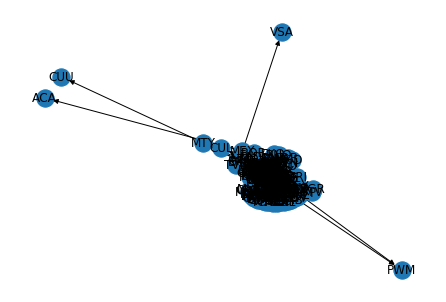

In [24]:
flightgraph_wt = nx.DiGraph()

# flight_graph.add_nodes_from(adjmatrix["source"].values)
# flight_graph.add_nodes_from(adjmatrix["dest"].values)

# flight_graph.nodes()
uniquecity =set()
weightage=+1
for ind in city_flights.index:
    flightgraph_wt.add_edge(city_flights['source'][ind],city_flights['dest'][ind],weight=city_flights["time_travel"][ind])
    uniquecity.add(city_flights['source'][ind])
    uniquecity.add(city_flights['dest'][ind])
#     flight_graph.add_edge(str(row['source']),str(row['dest']))

flightgraph_wt.nodes()
BLUE = "#99CCFF"
nx.draw(flightgraph_wt, with_labels=True)

How long does it take to travel to Honolulu, in flight times. 

In [25]:
print("Shortest path is ", nx.shortest_path(flightgraph_wt,"LEX","HNL",weight ='weight'))
print("Total number of hours = ", nx.dijkstra_path_length(flightgraph_wt,"LEX","HNL",weight ='weight'))

Shortest path is  ['LEX', 'ATL', 'HNL']
Total number of hours =  10
